# Examples

<div class="alert alert-info">
Note: This page is a work in progress!
</div>


In [2]:
%matplotlib inline 
import numpy as np
import msynchro
import matplotlib.pyplot as plt 
from msynchro.units import unit 
import test
test.set_mpl_defaults()

### Example Synchrotron Calculations

A synchrotron calculation can be carried out using a few simple commands. First, we can plot the spectrum emitted by a single synchrotron electron. 

Text(0, 0.5, '$P_\\nu$ (Normalised)')

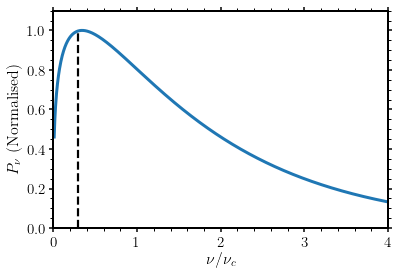

In [3]:
# specify a Lorentz factor and a reasonable range of frequencies
gamma = 1000.0 
B = 1e-6
nu_c = msynchro.nu_crit(gamma, B)
nu = np.linspace(0.01 * nu_c, nu_c * 4.0, 1000)
Pnu = msynchro.psynch(gamma, nu, B)

# plot result
plt.plot(nu/nu_c, Pnu / np.max(Pnu), lw=3)

# plot limits
plt.ylim(0,1.1)
plt.xlim(0,4)
plt.vlines([0.29], 0, 1, ls="--")
plt.xlabel(r"$\nu/\nu_c$", fontsize=16)
plt.ylabel(r"$P_\nu$ (Normalised)", fontsize=16)

Now we can plot the spectrum from a distribution of electrons.

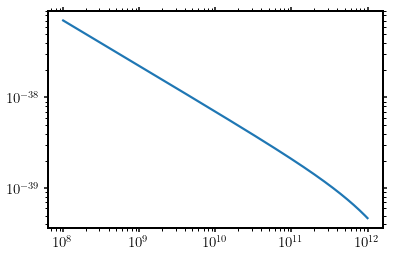

In [6]:
nu = np.logspace(8,12,1000)
energies = np.logspace(8,12,1000)
ne = energies ** -2.0 
B = 1e-6
spec = msynchro.Ptot(nu, energies, ne, B)
plt.loglog(nu, spec)

### Example Particle Evolution Calculations

A population of particles can be evolved using the tridiagonal matrix algorithm 
by specifying arrays holding the initial particle states, and the cooling rates. 